<a id="top"> </a>
<font size ="8" color = "blue"> <div align="center">**Titanic Survival Model**</div></font></br>

<font size ="5" color = "gray"> <div align="center">**- Classification / Regression -**</div></font>

-----------------------------------------
# Index
1. [Problem Statement](#marcoTeorico)
2. [Import Required Libraries](#importarLibs)
3. [Loading Datasets](#importarDatos)
4. [Overview of the Datasets](#analisisDatos1)
5. [Exploratory Data Analysis](#analisisDatos2)
6. [Data Preparation for Building Models](#preparacionDatos)
7. [Model Evaluation Criterion](#evaluacionModelo)
8. [Building the models (Regression)](#construirModelos1)
9. [Creating the predictions for submission](#enviarPrediccion)
10. [Export Datasets for ANN Modelling](#exportarModelos)
11.[Model Deployment](#implementarModelos)

-----------------------------------------
<a name="marcoTeorico"> </a>

# Use Case Title

## Synopsis

Titanic was a British passenger liner that sank in 1912 after colliding with an iceberg. Only 31% of passengers survived in this disaster. The goal of this project is to complete the analysis of what sorts of people were likely to survive.
For more information see [Titanic survival prediction challenge](#http://www.kaggle.com/c/titanic-gettingStarted) presented by Kaggle.

## Problem Statement

This is the legendary Titanic ML competition – the best, first challenge for you to dive into ML competitions and familiarize yourself with how the Kaggle platform works.

## The Challenge

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

## Objective

The competition is simple: use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.

## Data Description

### Overview

The data has been split into two groups:
- training set (train.csv)
- test set (test.csv)
The **training set** should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The **test set** should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

We also include **gender_submission.csv**, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.

### Data Dictionary

| **Variable** | **Definition**                                                                                                                                                                                                                                        | **Key**                                                |
|--------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|--------------------------------------------------------|
| survival     | Did passenger survive?                                                                                                                                                                                                                                | 0 > No<br>1 > Yes                                      |
| pclass       | Ticket class: A proxy for socio-economic status (SES)<br>- 1st = Upper<br>- 2nd = Middle<br>- 3rd = Lower                                                                                                                                             | 1 = 1st, <br>2 = 2nd, <br>3 = 3rd                      |
| sex          | Sex                                                                                                                                                                                                                                                   |                                                        |
| Age          | Age in years. Age is fractional if less than 1. <br>If the age is estimated, is it in the form of xx.5                                                                                                                                                |                                                        |
| sibsp        | # of siblings / spouses aboard the Titanic. <br>The dataset defines family relations in this way:<br>- Sibling = brother, sister, stepbrother, stepsister<br>- Spouse = husband, wife (mistresses and fiancés were ignored)                           |                                                        |
| parch        | # of parents / children aboard the Titanic.<br>The dataset defines family relations in this way:<br>Parent = mother, father<br>Child = daughter, son, stepdaughter, stepson<br>Some children travelled only with a nanny, therefore parch=0 for them. |                                                        |
| ticket       | Ticket number                                                                                                                                                                                                                                         |                                                        |
| fare         | Passenger fare                                                                                                                                                                                                                                        |                                                        |
| cabin        | Cabin number                                                                                                                                                                                                                                          |                                                        |
| embarked     | Port of embarkation                                                                                                                                                                                                                                   | C = Cherbourg, <br>Q = Queenstown, <br>S = Southampton |

#### Variable Notes

- **Survival:** Target variable.
- **All rest:** Features.

<a href = #top>Back to top</a>
<a name="importarLibs"> </a>

-----------------------------------------
# Setup Notebook Configurations

## Import the libraries required

In [1]:
# Import all the necessary packages

# Data structures
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pylab as plt
import seaborn as sns
#import plotly.express as pltxp

#Silhouette score
#from sklearn.metrics import silhouette_score

# PCA and TSNE
from sklearn.decomposition import PCA
#from sklearn.manifold import TSNE

# Clustering algorithms
#from sklearn.cluster import KMeans
#from sklearn.mixture import GaussianMixture
#from sklearn_extra.cluster import KMedoids

import warnings
warnings.filterwarnings("ignore")

### ML modelling libraries

In [2]:
# Importing the Machine Learning models we require from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

# Importing the other functions we may require from Scikit-Learn
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder # MinMaxScaler, LabelEncoder, OneHotEncoder

# To get different metric scores
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_auc_score, precision_recall_curve, roc_curve, make_scorer

## Setup environment configurations and global variables

In [3]:
# Set matplotlib plots styles
%matplotlib inline

#style.use('ggplot') or 
plt.style.use('ggplot')

# sns.set() will load seaborn's default theme and color 
# palette to the session
sns.set()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)

# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Plots proportion given by figsize=(24,16) tuple
# Where 12 is the horizontal value, 16 the vertical value and the 
# proportion is 1 to 1.5
myFigSize_12_12 = (12,12)
myFigSize_12_10 = (12,10)
myFigSize_12_8 = (12,8)
myFigSize_12_6 = (12,6)
myFigSize_12_4 = (12,4)
myFigSize_12_2 = (12,2)

# Intanciate the scaler.
scaler = StandardScaler()

# Instantiate the encoder
encoder = LabelEncoder()

In [4]:
# Creating plots font properties
# Family: serif, cursive, sans-serif, fantasy, monospace.
# Color: blue, green, cyan, white, yellow, etc.
# Size: Any positive integer value.
# Horizontal Alignment: 'center', 'right', 'left'
# Vertical Alignment: 'top', 'bottom', 'center', 'baseline', 'center_baseline'
fontTitleBold = {'family':'fantasy','color':'blue','size':20}
fontAxes = {'family':'serif','color':'darkred','size':15}
fontLegend = {'family':'cursive','color':'green','size':10}
fontTitles = {'family':'sans-serif',
              'color':'darkblue',
              'size':25,
              'verticalalignment': 'baseline',
              'horizontalalignment': 'center'}

<a href = #top>Back to top</a>
<a name="importarDatos"> </a>

-----------------------------------------
# Loading the dataset(s)

In [5]:
dataset = pd.read_csv('train.csv', index_col=0)
#dataset = pd.read_excel('TAL29 - Talent Dashboard Raw Data - As 202302 - 2023-05-03.xlsx',
#                        index_col=0, 
#                        skiprows=5,
#                       )
#dataset = pd.read_txt('nombreArchivo.csv')

### Validate data load

In [6]:
dataset.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
dataset.sample(n=5,random_state=1)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
863,1,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.0,0,0,17466,25.9292,D17,S
224,0,3,"Nenkoff, Mr. Christo",male,NaN,0,0,349234,7.8958,NaN,S
85,1,2,"Ilett, Miss. Bertha",female,17.0,0,0,SO/C 14885,10.5000,NaN,S
681,0,3,"Peters, Miss. Katie",female,NaN,0,0,330935,8.1375,NaN,Q
536,1,2,"Hart, Miss. Eva Miriam",female,7.0,0,2,F.C.C. 13529,26.2500,NaN,S


In [8]:
dataset[dataset['SibSp'] > 0].sample(n=5,random_state=1)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
810,1,1,"Chambers, Mrs. Norman Campbell (Bertha Griggs)",female,33.00,1,0,113806,53.1000,E8,S
173,1,3,"Johnson, Miss. Eleanor Ileen",female,1.00,1,1,347742,11.1333,NaN,S
312,1,1,"Ryerson, Miss. Emily Borie",female,18.00,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
803,1,1,"Carter, Master. William Thornton II",male,11.00,1,2,113760,120.0000,B96 B98,S


<a href = #top>Back to top</a>
<a name="analisisDatos1"> </a>

-----------------------------------------
# Overview of the dataset(s)

## Shape and Size

In [ ]:
print(f"There are {dataset.shape[0]} rows and {dataset.shape[1]} columns.\n")
print("Dataset size (rows x columns):",
      dataset.size)

## Information

In [ ]:
dataset.info()

## Data Types Count

In [ ]:
dataset.dtypes.value_counts()

## Duplicated Rows

If there are duplicated values then the rows need to be dropped:

> `dataset.drop_duplicates()`

In [ ]:
dataset.duplicated().sum()

## Column Labels

In [ ]:
dataset.columns.sort_values()

## Columns Value Counts

In [ ]:
dataset.count().sort_values(ascending=False)

## Features Missing Values

In [ ]:
# Let's check for missing values in the data
round(dataset.isnull().sum().sort_values(ascending=False) / len(dataset) * 100, 2)

## Unique Values

In [ ]:
dataset.nunique().sort_index()

## Unique Value Counts for Non-numeric Features

In [ ]:
# Defining the maximum list size of unique values 
maxValuesDisplay = 10  

for column in dataset.dtypes[dataset.dtypes == "object"].index:
    # Counting the unique values for the column
    valuesCount = dataset[column].value_counts(dropna = False)  
    print('Feature:', column)
    if len(valuesCount) > maxValuesDisplay:
        print(f"Only displaying first {maxValuesDisplay} of {len(valuesCount)} values.\n")
    print(valuesCount[:maxValuesDisplay],'\n')        
    print('-' * 80,"\n") 

## Data Statistical Description

In [ ]:
dataset.describe().T

## Observations:

- **Cabin:** This feature has 77% of values missing, the values are the cabin number for the passenger, column candidate to be dropped.
- **Age:** This feature has 20% of missing values, this value is only for the ticket owner, age of siblings, spouses, etc. were not captured.
- **Pclass:** Ticket class, ordinal categorial feature.
- **Ticket:** Ticket refers to the ticket number. The same family, including the parents and its sons and daughters, have same ticket number. If the family that boarded had 5 members (2 parents and 3 children) all 5 rows share same ticket number. 
- **SibSp:** 

<a href = #top>Back to top</a>
<a name="analisisDatos2"> </a>

-----------------------------------------
# **Exploratory Data Analysis (EDA)**

## *Univariate Data Analysis*

### Numeric Features Distribution and Variations

Define function to display the boxplot and histogram vertically aligned.

In [ ]:
# Defining the hist_box() function
def hist_box(col):
    print(col)
    print('Skew :',round(dataset[col].skew(),2))
    f, (ax_box, ax_hist) = plt.subplots(2,
                                        sharex=True, 
                                        gridspec_kw={'height_ratios': (0.20, 0.80)}, 
                                        figsize=myFigSize_12_4)
    
    # Adding a graph in each part
    sns.boxplot(dataset,
                x = col,
                ax=ax_box,
                showmeans=True)
    #plt.title(col,fontdict=fontTitles)
    sns.distplot(dataset[col], 
                 ax=ax_hist)
    #plt.title(col,fontdict=fontTitles)
    plt.show()

In [ ]:
for column in dataset.dtypes[(dataset.dtypes == 'int64') | (dataset.dtypes == 'float64')].index:
    hist_box(column)

### Checking relationships between survival and numerical variables

In [ ]:
# The mean of numerical features 
dataset.groupby(['Survived'])['Age','SibSp','Parch'].agg(['mean','std']).round(2)

### Categorical Features Distribution

In [ ]:
# The max unique values to display is determined from the unique values
# section above
maxUniqueValues = 25 + 1

def bar_plots(col):
    uniqueValues = dataset[col].nunique()
    if uniqueValues < maxUniqueValues:
        #print('Column Name: ', column)
        if uniqueValues < 4:
            thisFigSize = myFigSize_12_4
        elif uniqueValues > 9:
            thisFigSize = myFigSize_12_10
        else:
            thisFigSize = myFigSize_12_6
        dataset[col].value_counts().plot(kind='barh',
                                         title=column,
                                         figsize=thisFigSize)
        plt.show()

In [ ]:
for column in dataset.dtypes[(dataset.dtypes == 'object')].index:
    bar_plots(column)

In [ ]:
# Setting the dimensions of the plot
fig, ax = plt.subplots(figsize=myFigSize_12_4)

# Plot data
survival = [0,1]

# Create a data subset by iterating through the time value
for i in survival:
    subset = dataset[dataset['Survived'] == i]
    # Draw the density plot`
    # 'hist = False' will not plot a histogram
    # 'kde = True' plots density curve
    sns.distplot(subset['Age'], 
                 hist = True, 
                 ax=ax,
                 #kde = True,
                 #legend = True,
                 kde_kws = {'shade':True},
                 label = i)
plt.title('Age per survival state distribution',fontdict=fontTitles)
plt.ylabel('Density',fontdict=fontAxes)
plt.xlabel('Age',fontdict=fontAxes)
plt.show()

In [ ]:
for column in ['Parch', 'Pclass', 'SibSp', 'Survived']:
    bar_plots(column)
    plt.show()

## *Bivariate Data Analysis*

### Correlation Matrix

In [ ]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=myFigSize_12_6)

# Configure plot settings
sns.heatmap(dataset.corr(), ax=ax, annot = True, fmt = '.2f', cmap="YlGnBu")

plt.title('Correlation Matrix for Numerical Features',fontdict=fontTitles)
plt.ylabel('Features',fontdict=fontAxes)
plt.xlabel('Features',fontdict=fontAxes)

plt.show()

### Pair Plot

In [ ]:
# Configure Pair Plot
sns.pairplot(dataset, 
             #figsize=myFigSize_12_4,
             hue = "Sex")

# Add the axes labels to the plot
#plt.title('Features Plotting',fontdict=fontTitles)
#plt.ylabel('Features',fontdict=fontAxes)
#plt.xlabel('Features',fontdict=fontAxes)

# Displaying the plot
plt.show()

### Survival rate against passenger class

In [ ]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=myFigSize_12_4)

# Count plot
sns.countplot(x='Pclass',
              data=dataset,
              ax=ax,
              #legend=False,
              hue='Survived')

# Display the plot
plt.title('Absolute Survival Rate per Passenger Class',fontdict=fontTitles)
plt.ylabel('Count',fontdict=fontAxes)
plt.xlabel('Passenger Class',fontdict=fontAxes)
plt.show()

In [ ]:
# setting the dimensions of the plot
#plt.figure(figsize=myFigSize_12_4)

# Distribution Plot
sns.displot(data=dataset,
            #ax=ax,
            x='Pclass',
            hue='Survived',
            kind='hist',
            #kde=True,
            # multiple{“layer”, “dodge”, “stack”, “fill”}
            multiple='fill')

# Display the plot
plt.title('Relative Survival Rate per Passenger Class',fontdict=fontTitles)
plt.ylabel('Count',fontdict=fontAxes)
plt.xlabel('Passenger Class',fontdict=fontAxes)
plt.show()

In [ ]:
# Dataframe pivot table
pd.pivot_table(dataset,
               index='Pclass',
               values='Survived',
               aggfunc=['median','mean','std','min','max','count','sum'],
               margins=True,
               margins_name='Total:'
              ).round(2)

In [ ]:
# Dataframe pivot table
pd.pivot_table(dataset,
               index='Pclass', 
               values='Survived',
               aggfunc=['count','sum']               
              ).plot(kind='bar', 
                     figsize=myFigSize_12_4, 
                     title='Absolute passengers count vs total survived')

### Survival rate vs embarcation port

In [ ]:
# setting the dimensions of the plot
#fig, ax = plt.subplots(figsize=myFigSize_12_4)

# Distribution Plot
sns.displot(data=dataset,
            x='Embarked',
            hue='Survived',
            #ax=ax,
            kind='hist',
            kde=True,
            # multiple{“layer”, “dodge”, “stack”, “fill”}
            multiple='dodge')

# Display the plot
plt.title('Absolute Survival Rate per Embarked Port',fontdict=fontTitles)
plt.ylabel('Embarked',fontdict=fontAxes)
plt.xlabel('Count',fontdict=fontAxes)
plt.show()

In [ ]:
# setting the dimensions of the plot
#fig, ax = plt.subplots(figsize=myFigSize_12_4)

# Distribution Plot
sns.displot(data=dataset,
            #ax=ax,
            x='Embarked',
            hue='Survived',
            kind='hist',
            #kde=True,
            # multiple{“layer”, “dodge”, “stack”, “fill”}
            multiple='fill')

# Display the plot
plt.title('Relative Survival Rate per Embarkation Port',fontdict=fontTitles)
plt.ylabel('Count',fontdict=fontAxes)
plt.xlabel('Embarked',fontdict=fontAxes)
plt.show()

In [ ]:
# Dataframe pivot table
pd.pivot_table(dataset,
               index='Embarked', #['Embarked','Survived'],
               values='Survived',
               aggfunc=['median','mean','std','min','max','count','sum'],
               margins=True,
               margins_name='Total:'
              ).round(2)

### Survival rate vs sex

In [ ]:
# setting the dimensions of the plot
#fig, ax = plt.subplots(figsize=myFigSize_12_4)

# Distribution Plot
sns.displot(data=dataset,
            #ax=ax,
            x='Sex',
            hue='Survived',
            kind='hist',
            #kde=True,
            # multiple{“layer”, “dodge”, “stack”, “fill”}
            multiple='dodge')

# Display the plot
plt.title('Absolute Survival Rate per Sex'plt.title,fontdict=fontTitles)
plt.ylabel('Count',fontdict=fontAxes)
plt.xlabel('Sex',fontdict=fontAxes)
plt.show()

In [ ]:
# setting the dimensions of the plot
#fig, ax = plt.subplots(figsize=myFigSize_12_4)

# Distribution Plot
sns.displot(data=dataset,
            #ax=ax,
            x='Sex',
            hue='Survived',
            kind='hist',
            #kde=True,
            # multiple{“layer”, “dodge”, “stack”, “fill”}
            multiple='fill')

# Display the plot
plt.title('Relative Survival Rate per Sex',fontdict=fontTitles)
plt.ylabel('Count',fontdict=fontAxes)
plt.xlabel('Sex',fontdict=fontAxes)
plt.show()

In [ ]:
# Dataframe pivot table
pd.pivot_table(dataset,
               index='Sex', 
               values='Survived',
               aggfunc=['median','mean','std','min','max','count','sum'],
               margins=True,
               margins_name='Total:'
              ).round(2)

### Survival rate vs age

In [ ]:
# Setting the dimensions of the plot
#fig, ax = plt.subplots(figsize=myFigSize_12_4)

# Distribution Plot
sns.displot(data=dataset,
            #ax=ax,
            x='Age',
            hue='Survived',
            kind='hist',
            kde=True,
            # multiple{“layer”, “dodge”, “stack”, “fill”}
            multiple='dodge')

# Display the plot
plt.title('Absolute Survival Rate per Age',fontdict=fontTitles)
plt.ylabel('Age',fontdict=fontAxes)
plt.xlabel('Count',fontdict=fontAxes)

plt.show()

#### Adding an age binning feature for analysis

In [9]:
def addAgeBins(data):
    #Age binning
    data['Age_bin'] = pd.cut(data['Age'], 
                             bins=[0,10,20,30,40,50,60,100], 
                             labels=['0-10','11-20','21-30','31-40','41-50','51-60','60+'])
    return data

In [10]:
dataset = addAgeBins(dataset)
dataset.sample(n=5,random_state=1)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_bin
PassengerId,,,,,,,,,,,,
863,1,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.0,0,0,17466,25.9292,D17,S,41-50
224,0,3,"Nenkoff, Mr. Christo",male,NaN,0,0,349234,7.8958,NaN,S,NaN
85,1,2,"Ilett, Miss. Bertha",female,17.0,0,0,SO/C 14885,10.5000,NaN,S,11-20
681,0,3,"Peters, Miss. Katie",female,NaN,0,0,330935,8.1375,NaN,Q,NaN
536,1,2,"Hart, Miss. Eva Miriam",female,7.0,0,2,F.C.C. 13529,26.2500,NaN,S,0-10


In [ ]:
# setting the dimensions of the plot
#fig, ax = plt.subplots(figsize=myFigSize_12_4)

# Distribution Plot
sns.displot(data=dataset,
            #ax=ax,
            x='Age_bin',
            hue='Survived',
            kind='hist',
            kde=True,
            # multiple{“layer”, “dodge”, “stack”, “fill”}
            multiple='dodge')

# Display the plot
plt.title('Absolute Survival Rate per Age',fontdict=fontTitles)
plt.ylabel('Count',fontdict=fontAxes)
plt.xlabel('Age Bins',fontdict=fontAxes)

plt.show()

In [ ]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=myFigSize_12_4)

# Strip Plot (scatter plot for category features)
sns.stripplot(y='Age',
              x='Survived',
              data=dataset,
              ax=ax,
              #size='SibSp',
              #sizes=(5,10),
              legend=True,
              alpha=0.65,
              jitter=True,
              hue='Sex')

# Display the plot
plt.title('Survival per Age Frequency Distribution by Sex',fontdict=fontTitles)
plt.ylabel('Age',fontdict=fontAxes)
plt.xlabel('Survived',fontdict=fontAxes)

plt.show()

In [ ]:
# setting the dimensions of the plot
#fig, ax = plt.subplots(figsize=myFigSize_12_4)

# Distribution Plot
sns.displot(data=dataset,
            #ax=ax,
            x='Age',
            hue='Survived',
            kind='hist',
            #kde=True,
            # multiple{“layer”, “dodge”, “stack”, “fill”}
            multiple='fill')

# Display the plot
plt.title('Relative Survival Rate per Age')
plt.ylabel('Count',fontdict=fontAxes)
plt.xlabel('Age',fontdict=fontAxes)

plt.show()

In [ ]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=myFigSize_12_4)

# Setup the violin plot
sns.violinplot(y='Age',
               x='Survived',
               data=dataset,
               ax=ax,
               hue='Sex',
               split=True) #,order[])

# add the axes labels to the plot
plt.title('Survival vs Age Dispersion',fontdict=fontTitles)
plt.ylabel('Age',fontdict=fontAxes)
plt.xlabel('Parch',fontdict=fontAxes)

# Displaying the plot
plt.show()

### Passenger class, embarking port and sex analysis

In [ ]:
# Dataframe pivot table
pd.pivot_table(dataset,
               index=['Pclass','Embarked','Sex'],
               values='Survived',
               aggfunc=['mean','std','count','sum'],
               margins=True,
               margins_name='Total:'
              ).round(2)

In [ ]:
# Dataframe pivot table
pd.pivot_table(dataset,
               index=['Pclass','Sex'], 
               values='Survived',
               aggfunc=['count','sum']               
              ).plot(kind='bar', #'bar','line','histogram','scatter',
                     figsize=myFigSize_12_4, 
                     xlabel='Passenger Class / Sex',
                     title='Total passengers count vs total survived by class and sex')

In [ ]:
dataset.groupby(['Pclass','Embarked','Sex'])['Survived'].agg(['mean','std','count','sum']).round(2)

<a name="survivalProba"> </a>
#### Observations:

- *First Passenger Class (1):* Females no matter where did they embark had a minimum survival probability of 95.8%, a survival average of 97.83%. Men's average survival rate was 25.26%.
- *Second Passenger Class (2):* Females average survival rate is 97.03%. Men average falls down to 11.83%.
- *Third Passenger Class (3):* Females survival average rate is 58.47%. Men average is just 14.59%.
- The chance of survival for a *third* class passenger is lower than for the other classes, for *third* class female passengers the survival rate is 40% lower compared to *first* and *second* class females.
- Key relations: 
    - Just being a female increases the chance of survival by 3.9 times. Female: 74.2%. Male: 18.9%.
    - Being a passenger in a higher provides more chance of survival. Class 1: 62.9%. Class 2: 47.3%. Class 3: 24.3%.
    - The embarkation port also has a noticeable influence. Cherbourg (C): 55.3%. Queenstown (Q): 38.9%. Southampton (S): 33.7%.
- Weight factors:    
    - Female in class 1 embarked at Cherbourg: 25.8%.
    - Male in class 3 embarked at Southampton: 1.5%

### Age vs fare amount

Fare is the total amount paid for the entire family group, therefore cannot be used as prorated amount per person.

In [ ]:
# Setup the scatter plot
sns.scatterplot(y='Fare',
                x='Age',
                data=dataset,
                #ax=ax,
                size='SibSp',
                legend=True,
                alpha=0.65,
                sizes=(5,100),
                hue='Survived')

# add the axes labels to the plot
plt.title('Distribution of Age vrs Fare Cost',fontdict=fontTitles)
plt.ylabel('Fare')
plt.xlabel('Age')

# display the plot
plt.show()

In [ ]:
# Creating pivot table
#dataset.groupby(['Embarked','Sex'])['Fare'].agg(['median','mean','std','min','max','sum'])
pd.pivot_table(dataset,
               index=['Embarked','Survived'],
               values='Fare',
               aggfunc=['mean','median','std','min','max','sum'],
               margins=True,
               margins_name='Total:'
              ).round(2)

### Survival rate vs fare and passenger class

In [ ]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=myFigSize_12_4)

# Setup the violin plot
sns.violinplot(y='Fare',
               x='Pclass',
               data=dataset,
               ax=ax,
               hue='Survived',
               split=True) #,order[])

# add the axes labels to the plot
plt.title('Ticket Class vrs Fare Cost',fontdict=fontTitles)
plt.ylabel('Fare Cost',fontdict=fontAxes)
plt.xlabel('Ticket Class',fontdict=fontAxes)

# Displaying the plot
plt.show()

In [ ]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=myFigSize_12_4)

# Setup the violin plot
sns.violinplot(y='Age',
               x='Pclass',
               data=dataset,
               ax=ax,
               hue='Survived',
               split=True) #,order[])

# add the axes labels to the plot
plt.title('Ticket Class vrs Fare Cost',fontdict=fontTitles)
plt.ylabel('Age',fontdict=fontAxes)
plt.xlabel('Ticket Class',fontdict=fontAxes)

# Displaying the plot
plt.show()

In [ ]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=myFigSize_12_4)

# Setup the violin plot
sns.violinplot(y='Age',
               x='SibSp',
               data=dataset,
               ax=ax,
               hue='Survived',
               split=True) #,order[])

# add the axes labels to the plot
plt.title('Age vs Siblings/Spouse',fontdict=fontTitles)
plt.ylabel('Age',fontdict=fontAxes)
plt.xlabel('Siblings/Spouse',fontdict=fontAxes)

In [ ]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=myFigSize_12_4)

# Setup the violin plot
sns.violinplot(y='Age',
               x='Parch',
               data=dataset,
               ax=ax,
               hue='Survived',
               split=True) #,order[])

# add the axes labels to the plot
plt.title('Ticket Class vrs Fare Cost',fontdict=fontTitles)
plt.ylabel('Age',fontdict=fontAxes)
plt.xlabel('Parch',fontdict=fontAxes)

# Displaying the plot
plt.show()

<a href = #top>Back to top</a>
<a name="preparacionDatos"> </a>

-----------------------------------------
# Data Preparation for Building Models

## Transform Dataset(s)

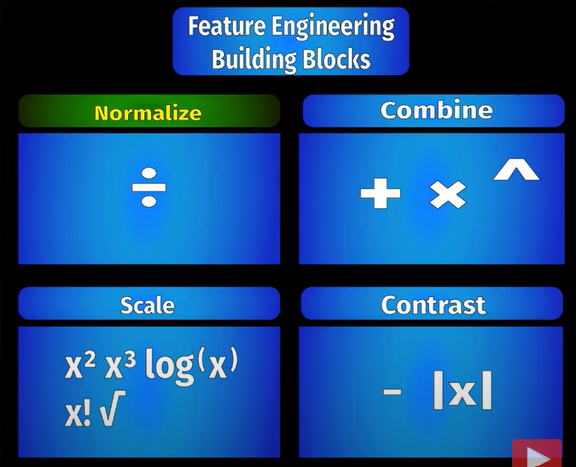

[Feature Engineering Lego Blocks](https://youtu.be/X4pWmkxEikM?t=308)

## Imputing missing values

### Checking dataset's missing values

In [11]:
dataset.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
Age_bin     177
dtype: int64

### Filling missing values

Cabin feature will be discarded for modelling son no need to impute missing values there.

In [12]:
def fillingMissingValues(data):
    # Missing values imputation
    embarkedFillValue = data['Embarked'].mode()
    ageBinFillValue = data['Age_bin'].mode()

    data['Age'].fillna(data['Age'].median(), inplace=True)
    data['Age_bin'].fillna(ageBinFillValue[0], inplace=True)
    data['Embarked'].fillna(embarkedFillValue[0], inplace=True)
    
    # Printing missing values imputation results
    print('Missing Values Counts:')
    print(data.isnull().sum())
    
    return data

In [13]:
dataset = fillingMissingValues(dataset)

dataset.sample(n=5,random_state=1)

Missing Values Counts:
Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
Age_bin       0
dtype: int64


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_bin
PassengerId,,,,,,,,,,,,
863,1,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.0,0,0,17466,25.9292,D17,S,41-50
224,0,3,"Nenkoff, Mr. Christo",male,28.0,0,0,349234,7.8958,NaN,S,21-30
85,1,2,"Ilett, Miss. Bertha",female,17.0,0,0,SO/C 14885,10.5000,NaN,S,11-20
681,0,3,"Peters, Miss. Katie",female,28.0,0,0,330935,8.1375,NaN,Q,21-30
536,1,2,"Hart, Miss. Eva Miriam",female,7.0,0,2,F.C.C. 13529,26.2500,NaN,S,0-10


## Feature engineering

### Adding survival probability feature

This probability is calculated out of the <a href = #survivalProba>bivariate analysis</a>. 

In [14]:
# Add probability column 
def survivalProbability(dataRow):
    # Function variables
    returnValue = 0
    dataValue = 0
    # Read passenger class and assign probability
    # Class 1: 62.9%. Class 2: 47.3%. Class 3: 24.3%
    if (dataRow.Pclass == 1):
        returnValue = 0.629
    elif (dataRow.Pclass == 2):
        returnValue = 0.473
    else:
        returnValue = 0.243
    # Read passenger sex and assign probability
    # Female: 74.2%. Male: 18.9%
    if (dataRow.Sex == 'male'):
        returnValue *= 0.189
    else:
        returnValue *= 0.742
    # Read passenger embarking port and assign probability
    # Cherbourg (C): 55.3%. Queenstown (Q): 38.9%. Southampton (S): 33.7%
    if (dataRow.Embarked == 'C'):
        returnValue *= 0.553
    elif (dataRow.Embarked == 'Q'):
        returnValue *= 0.389
    else:
        returnValue *= 0.337
    # Calculate combined probability
    return returnValue

In [15]:
dataset['SurvProba'] = dataset.apply(survivalProbability,axis=1)

dataset.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_bin,SurvProba
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,21-30,0.015477
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,31-40,0.258095
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,21-30,0.060763
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,31-40,0.157284
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,31-40,0.015477


In [ ]:
plt.figure(figsize  = myFigSize_12_4)
plt.title('Correlation Matrix')
sns.heatmap(dataset[['Pclass','Age','SibSp','Parch','Fare','SurvProba','Survived']].corr(), 
            annot = True, 
            fmt = '.2f', 
            cmap="YlGnBu")
plt.show()

### Principal Component Analysis

#### Scaling the dataset

Importing required libraries. This  code can be deleted since is already covered in the first libraries import section.

In [ ]:
#Data scaler using Z-Score
#from sklearn.preprocessing import StandardScaler

#Silhouette score
#from sklearn.metrics import silhouette_score

# PCA and TSNE
#from sklearn.decomposition import PCA
#from sklearn.manifold import TSNE

#### Copy dataset and features dropping for PCA

Creating new dataset with only the features of interest selected after the EDA.

In [ ]:
#Columns to scale
columns_pca = ['Pclass','Sex','Age','SibSp','Fare','Embarked','SurvProba']

# Make copy of dataset with features of interest
dataset_numeric = dataset[columns_pca].copy(deep=True)

#### Encoding, scaling dataset

In [ ]:
# Encode categorical features
# Create list of features to be encoded
to_get_dummies_for = ['Sex', 'Embarked']

# Creating dummy variables
dataset_numeric = pd.get_dummies(data = dataset_numeric, 
                                 columns = to_get_dummies_for, 
                                 drop_first = True)      

# Scaling numeric data.
dataset_scaled = pd.DataFrame(scaler.fit_transform(dataset_numeric), 
                              columns=dataset_numeric.columns)

dataset_scaled.sample(n=8,random_state=1)

#### Performing PCA

In [ ]:
#Defining the number of principal components to generate 
n = dataset_scaled.shape[1]

#Finding principal components for the data
pca = PCA(n_components = n, random_state=1)
dataset_pca = pd.DataFrame(pca.fit_transform(dataset_scaled))

#The percentage of variance explained by each principal component
exp_var = pca.explained_variance_ratio_

print('Explained Variance ratio:')
exp_var

In [ ]:
# Visualizing the Explained Individual Components
dim = len(exp_var) + 1

# Plotting cumulative variances
plt.figure(figsize = myFigSize_12_6)
plt.plot(range(1,dim), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title("Explained Variances by Components",
          fontdict=fontTitles
         )
plt.xlabel("Number of Components",fontdict=fontAxes)
#plt.legend(loc='best')
plt.ylabel("Cumulative Explained Variance",fontdict=fontAxes)

#### Principal Components Weights per Feature

In [ ]:
pc_comps = ['PC1','PC2','PC3','PC4']
data_pca = pd.DataFrame(np.round(pca.components_[:4,:],2),
                        index=pc_comps,
                        columns=dataset_numeric.columns)
data_pca.T

## Transforming imported training dataset for modelling

Creating dataset to be used for the models training.

In [16]:
print('dataset:\n', dataset.columns)

dataset:
 Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'Age_bin', 'SurvProba'],
      dtype='object')


### Dropping features not relevant for modelling

In [17]:
# Dropping features
# Initial column grop was: ['Name','Cabin','Fare','Ticket','Age_bin']
# On June 2,23 is the following:
dataset_models = dataset.drop(['Name','Cabin','Ticket','Age_bin'],axis=1) #,inplace=True)

dataset_models.sample(n=5,random_state=1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,SurvProba
PassengerId,,,,,,,,,
863,1,1,female,48.0,0,0,25.9292,S,0.157284
224,0,3,male,28.0,0,0,7.8958,S,0.015477
85,1,2,female,17.0,0,0,10.5000,S,0.118276
681,0,3,female,28.0,0,0,8.1375,Q,0.070139
536,1,2,female,7.0,0,2,26.2500,S,0.118276


### Encoding and mapping columns

In [18]:
# Mapping sex feature
dictSex = {'male': 1, 'female' : 0}

dataset_models.Sex = dataset_models.Sex.map(dictSex)

dataset_models.sample(n=5,random_state=1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,SurvProba
PassengerId,,,,,,,,,
863,1,1,0,48.0,0,0,25.9292,S,0.157284
224,0,3,1,28.0,0,0,7.8958,S,0.015477
85,1,2,0,17.0,0,0,10.5000,S,0.118276
681,0,3,0,28.0,0,0,8.1375,Q,0.070139
536,1,2,0,7.0,0,2,26.2500,S,0.118276


In [19]:
# Creating dummy variables
dataset_models = pd.get_dummies(data = dataset_models, 
                                 columns = ['Embarked'], 
                                 drop_first = True)

dataset_models.sample(n=5,random_state=1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,SurvProba,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,
863,1,1,0,48.0,0,0,25.9292,0.157284,0,1
224,0,3,1,28.0,0,0,7.8958,0.015477,0,1
85,1,2,0,17.0,0,0,10.5000,0.118276,0,1
681,0,3,0,28.0,0,0,8.1375,0.070139,1,0
536,1,2,0,7.0,0,2,26.2500,0.118276,0,1


### Splitting features from target variable

Current datasets columns list.

In [20]:
# Target variable dataset
y = dataset_models['Survived']

y.sample(n=5,random_state=1)

PassengerId
863    1
224    0
85     1
681    0
536    1
Name: Survived, dtype: int64

In [21]:
# Features dataset
X = dataset_models.drop('Survived',axis=1)

X.sample(n=5,random_state=1)

,Pclass,Sex,Age,SibSp,Parch,Fare,SurvProba,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,
863,1,0,48.0,0,0,25.9292,0.157284,0,1
224,3,1,28.0,0,0,7.8958,0.015477,0,1
85,2,0,17.0,0,0,10.5000,0.118276,0,1
681,3,0,28.0,0,0,8.1375,0.070139,1,0
536,2,0,7.0,0,2,26.2500,0.118276,0,1


### Checking datasets shapes

In [22]:
print('y: ',y.shape)
print('X: ',X.shape)

y:  (891,)
X:  (891, 9)


## Create scaled training and test datasets

We will scale the data for **Logistic Regression** and **SVM**.  We will use the **Standard Scaler** method, which centers and scales the dataset using the Z-Score. It standardizes features by subtracting the mean and scaling it to have unit variance. The standard score of sample x is calculated as:

> **z = (x - u) / s**

where **u** is the mean of the training samples (zero) and **s** is the standard deviation of the training samples.

Tree based models such as **Decision Trees** and **Random Forest** does not require feature scaling to be performed as they are not sensitive to the variance in the data.

### Scaling features (X)

In [23]:
# Fit_transform on train data

# Scaling training dataset
X_scaled = pd.DataFrame(scaler.fit_transform(X), 
                        index=X.index,                        
                        columns=X.columns)

X_scaled.sample(n=5,random_state=1)

,Pclass,Sex,Age,SibSp,Parch,Fare,SurvProba,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,
863,-1.566107,-1.355574,1.432359,-0.474545,-0.473674,-0.126345,1.577904,-0.307562,0.615838
224,0.827377,0.737695,-0.104637,-0.474545,-0.473674,-0.489442,-0.735727,-0.307562,0.615838
85,-0.369365,-1.355574,-0.949986,-0.474545,-0.473674,-0.437007,0.941466,-0.307562,0.615838
681,0.827377,-1.355574,-0.104637,-0.474545,-0.473674,-0.484576,0.156099,3.251373,-1.623803
536,-0.369365,-1.355574,-1.718484,-0.474545,2.008933,-0.119886,0.941466,-0.307562,0.615838


## Splitting training dataset into train and test subsets

This classification problem exhibits a large imbalance in the distribution of the target classes, for instance there is more negative samples than positive samples, 1:2 proportion. In these cases it is recommended to use the **stratified sampling** technique to ensure that relative class frequencies are approximately preserved in each train and validation fold.

### Imported training dataset

In [24]:
# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=1)

### Imported scaled training dataset

In [25]:
# Splitting data in train and test sets
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y, 
                                                                                test_size=0.20, 
                                                                                random_state=1)

## Datasets sanity check

#### Imported dataset

In [26]:
print("Shape of Training X set : ", X_train.shape)
print("Shape of Training y set : ", y_train.shape)
print("Shape of test X set :     ", X_test.shape)
print("Shape of test y set :     ", y_test.shape,"\n")
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True),"\n")
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training X set :  (712, 9)
Shape of Training y set :  (712,)
Shape of test X set :      (179, 9)
Shape of test y set :      (179,) 

Percentage of classes in training set:
0    0.622191
1    0.377809
Name: Survived, dtype: float64 

Percentage of classes in test set:
0    0.592179
1    0.407821
Name: Survived, dtype: float64


#### Scaled dataset

In [27]:
print("Shape of scaled Training X set : ", X_train_scaled.shape)
print("Shape of scaled Training y set : ", y_train_scaled.shape)
print("Shape of scaled test X set :     ", X_test_scaled.shape)
print("Shape of scaled test y set :     ", y_test_scaled.shape,"\n")
print("Percentage of classes in caled training set:")
print(y_train_scaled.value_counts(normalize=True),"\n")
print("Percentage of classes in scaled test set:")
print(y_test_scaled.value_counts(normalize=True))

Shape of scaled Training X set :  (712, 9)
Shape of scaled Training y set :  (712,)
Shape of scaled test X set :      (179, 9)
Shape of scaled test y set :      (179,) 

Percentage of classes in caled training set:
0    0.622191
1    0.377809
Name: Survived, dtype: float64 

Percentage of classes in scaled test set:
0    0.592179
1    0.407821
Name: Survived, dtype: float64


<a href = #top>Back to top</a>
<a name="evaluacionModelo"> </a>

-----------------------------------------
# **Model Evaluation Criterion**

## Confussion Matrix

|                    |                Predicted Negative (0)           |              Predicted Positive (1)              |
|-------------------:|:-----------------------------------------------:|:------------------------------------------------:|
| Actual Negative (0) | **TN**<br>(True Negative)                      | **FP** <br>(False Positive: Type I)<br>Precision |
| Actual Positive (0) | **FN** <br>(False Negative: Type II)<br>Recall | **TP**<br>(True Positive)                        |

Based on: `tn, fp, fn, tp = confusion_matrix()`
[sklearn.metrics.confusion_matrix documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#examples-using-sklearn-metrics-confusion-matrix)

## **Model can make wrong predictions as:**

1. Predicting a passenger survived but in reality died (false-positives).
2. Predicting a passenger died but in reality survived (false-negatives). 

## **Which case is more important?** 

Both the cases are important as:

* If we predict that a passenger survived but in fact died is important for the challenge.
* If we predict that a passenger died but in fact survived is also important for the challenge score. 

## **How to reduce the losses?**

* The competition requires the `F1 Score` to be maximized, the greater the F1  score, the higher the chances of minimizing False Negatives and False Positives,  which means a better predictive model. 

## Model evaluation function

In [28]:
# Creating metric function 
def metrics_score(actual, predicted, display_CF):
    print(classification_report(actual, predicted),'\n')

    if (display_CF == True):
        #Creating confusion matrix
        cm = confusion_matrix(actual, predicted)

        # Setup heatmap plot for the CM
        plt.figure(figsize=myFigSize_12_2)

        sns.heatmap(cm, 
                    annot=True,  
                    fmt='.2f', 
                    linewidth=.5,
                    cmap='YlGnBu',
                    xticklabels=['Died (0)', 'Survived (1)'], 
                    yticklabels=['Died (0)', 'Survived (1)'])
        plt.title('Confusion Matrix',
                  fontdict=fontTitles
                 )
        plt.ylabel('Actual',fontdict=fontAxes)
        plt.xlabel('Predicted',fontdict=fontAxes)
        plt.show()

<a href = #top>Back to top</a>
<a name="construirModelos1"> </a>

-----------------------------------------
# Building the models

We will be building 4 different models:

- [*Logistic Regression*](#logisticRegression)
- [*Support Vector Machine (SVM)*](#SVM)
- [*K Neighbors*](#KN)
- [*Decision Tree*](#decisionTree)
- [*Random Forest*](#randomForest)

<a name="logisticRegression"> </a>
## Logistic Regression

### Building the model

Building and training the model with the scaled dataset. Logistic regression models are very sensitive to outliers and wont predict accurately if data is not scaled first.

In [29]:
# Fitting logistic regression model
model_LG = LogisticRegression()
model_LG.fit(X_train_scaled, y_train_scaled)

LogisticRegression()

### Model performance evaluation on the scaled training data

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       443
           1       0.83      0.67      0.74       269

    accuracy                           0.82       712
   macro avg       0.83      0.79      0.80       712
weighted avg       0.82      0.82      0.82       712
 



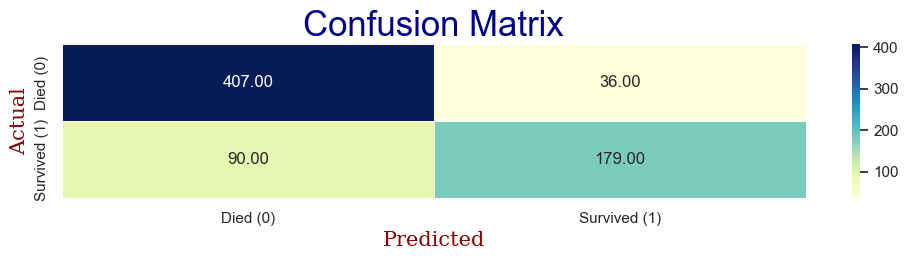

In [30]:
#Checking the model's performance using the evaluation function
y_train_scaled_predictions_LG = model_LG.predict(X_train_scaled)

#Calling the function and passing the datasets
metrics_score(y_train_scaled, y_train_scaled_predictions_LG, True)

### Model performance evaluation on the scaled test data

In [31]:
#Checking the model's performance using the evaluation function
y_test_scaled_predictions_LG = model_LG.predict(X_test_scaled)

#Calling the function and passing the datasets
metrics_score(y_test_scaled, y_test_scaled_predictions_LG, False)

              precision    recall  f1-score   support

           0       0.77      0.90      0.83       106
           1       0.80      0.60      0.69        73

    accuracy                           0.78       179
   macro avg       0.78      0.75      0.76       179
weighted avg       0.78      0.78      0.77       179
 



### Model coefficients and odds per feature

The coefficients allow to find which variables are leading to survival and which can help to reduce the survivals.

In [ ]:
# Printing the coefficients of logistic regression
cols = X_train_scaled.columns

coefficients_LG = model_LG.coef_

pd.DataFrame(coefficients_LG,
             columns = cols).T.sort_values(by = 0,ascending = False)

The coefficients of the **logistic regression** model give us the **log of odds**, which is hard to interpret in the real world. We can convert the **log of odds into real odds** by taking its exponential.

In [ ]:
# Finding the odds
odds_LG = np.exp(model_LG.coef_[0]) 

# Adding the odds to a dataframe and sorting the values
pd.DataFrame(odds_LG, 
             X_train_scaled.columns, 
             columns = ['Odds']).sort_values(by ='Odds', ascending = False) 

### Finding the optimal threshold for the model using the Precision-Recall Curve

Precision-Recall curves summarize the trade-off between the true positive rate and the positive predictive value for a predictive model using different probability thresholds.

Let's use the Precision-Recall curve and see if we can find a **better threshold.**

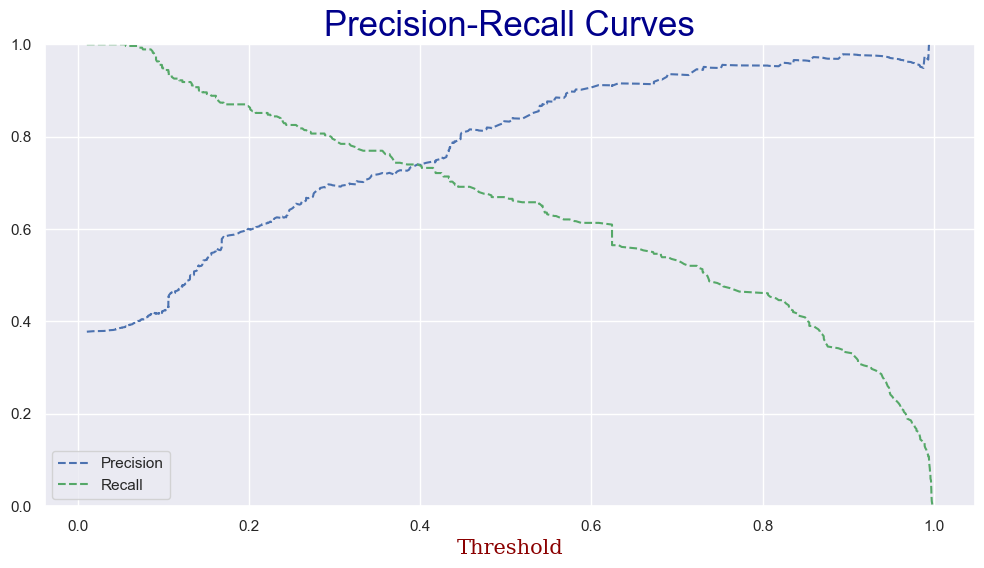

In [32]:
# Predict_proba gives the probability of each observation belonging to each class
y_scaled_scores_LG = model_LG.predict_proba(X_train_scaled)

precisions_LG, recalls_LG, thresholds_LG = precision_recall_curve(y_train_scaled, 
                                                                  y_scaled_scores_LG[:,1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize=myFigSize_12_6)
plt.plot(thresholds_LG, precisions_LG[:-1], 'b--', label='Precision')
plt.plot(thresholds_LG, recalls_LG[:-1], 'g--', label = 'Recall')
plt.title('Precision-Recall Curves',
          fontdict=fontTitles
         )
plt.xlabel('Threshold',fontdict=fontAxes)
plt.legend(loc='best')
plt.ylim([0,1])
plt.show()

In [67]:
# Calculating the exact threshold where precision and recall are equal.
optimal_threshold_LG = 0.0

for i in np.arange(len(thresholds_LG)):
    if precisions_LG[i]==recalls_LG[i]:
        optimal_threshold_LG = np.round(thresholds_LG[i],2)
        print('Optimal Threshold: ',optimal_threshold_LG)

Optimal Threshold:  0.4


### Model performance evaluation with optimal threshold on the training data

In [34]:
# Creating performance indicators and confusion matrix on train data
y_train_scaled_predictions_LG_opt = model_LG.predict_proba(X_train_scaled)
metrics_score(y_train_scaled, y_train_scaled_predictions_LG_opt[:,1] > optimal_threshold,False)

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       443
           1       0.74      0.74      0.74       269

    accuracy                           0.80       712
   macro avg       0.79      0.79      0.79       712
weighted avg       0.80      0.80      0.80       712
 



### Model performance evaluation with optimal threshold on the test data

In [35]:
# Creating performance indicators and confusion matrix on test data 
y_test_scaled_predictions_LG_opt = model_LG.predict_proba(X_test_scaled)
metrics_score(y_test_scaled, y_test_scaled_predictions_LG_opt[:,1] > optimal_threshold,False)

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       106
           1       0.77      0.74      0.76        73

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179
 



### Model Performance Findings or Observations

- **Observation 1:** TBD
- **Observation 2:** TBD
- **Observation 3:** TBD

<a href = #construirModelos1>Back to **building models**</a>

----

<a name="SVM"> </a>
## Support Vector Machines (SVM)

### Kernel functions

1.   [*Linear Kernel*](#linearKernel)
2.   [*RBF Kernel*](#rbfKernel)

### Linear Kernel SVM

#### Training SVM model

In [36]:
# Fitting the model with the scaled training data.
# Linear kernel or linear decision boundary model used
model_SVM_lk = SVC(kernel='linear', probability=True)
model_SVM_lk.fit(X = X_train_scaled, y = y_train_scaled)

SVC(kernel='linear', probability=True)

### Model Performance Evaluation on the training data

In [37]:
#Checking the model's performance using the evaluation function
y_train_scaled_predictions_SVM_lk = model_SVM_lk.predict(X_train_scaled)

#Calling the function and passing the datasets
metrics_score(y_train_scaled, y_train_scaled_predictions_SVM_lk, False)

              precision    recall  f1-score   support

           0       0.80      0.95      0.87       443
           1       0.88      0.62      0.73       269

    accuracy                           0.83       712
   macro avg       0.84      0.79      0.80       712
weighted avg       0.83      0.83      0.82       712
 



### Model Performance Evaluation on the Test Data

In [38]:
#Checking the model's performance using the evaluation function
y_test_scaled_predictions_SVM_lk = model_SVM_lk.predict(X_test_scaled)

#Calling the function and passing the datasets
metrics_score(y_test_scaled, y_test_scaled_predictions_SVM_lk, False)

              precision    recall  f1-score   support

           0       0.74      0.92      0.82       106
           1       0.83      0.53      0.65        73

    accuracy                           0.77       179
   macro avg       0.79      0.73      0.74       179
weighted avg       0.78      0.77      0.75       179
 



<a name="rbfKernel"> </a>

### RBF Kernel SVM

#### Training SVM model

In [39]:
# Fitting the model with the scaled training data.
# Radial Basis Function (RBF) boundary model
model_SVM_rbf = SVC(kernel='rbf', probability=True)
model_SVM_rbf.fit(X = X_train_scaled, y = y_train_scaled)

SVC(probability=True)

### Model Performance Evaluation on the training data

In [40]:
#Checking the model's performance using the evaluation function
y_train_scaled_predictions_SVM_rbf = model_SVM_rbf.predict(X_train_scaled)

#Calling the function and passing the datasets
metrics_score(y_train_scaled, y_train_scaled_predictions_SVM_rbf, False)

              precision    recall  f1-score   support

           0       0.84      0.96      0.89       443
           1       0.91      0.69      0.78       269

    accuracy                           0.86       712
   macro avg       0.87      0.82      0.84       712
weighted avg       0.86      0.86      0.85       712
 



### Model Performance Evaluation on the Test Data

In [41]:
#Checking the model's performance using the evaluation function
y_test_scaled_predictions_SVM_rbf = model_SVM_rbf.predict(X_test_scaled)

#Calling the function and passing the datasets
metrics_score(y_test_scaled, y_test_scaled_predictions_SVM_rbf, False)

              precision    recall  f1-score   support

           0       0.75      0.94      0.84       106
           1       0.87      0.55      0.67        73

    accuracy                           0.78       179
   macro avg       0.81      0.75      0.75       179
weighted avg       0.80      0.78      0.77       179
 



### Finding the optimal threshold for the model using the Precision-Recall Curve

Precision-Recall curves summarize the trade-off between the true positive rate and the positive predictive value for a predictive model using different probability thresholds.

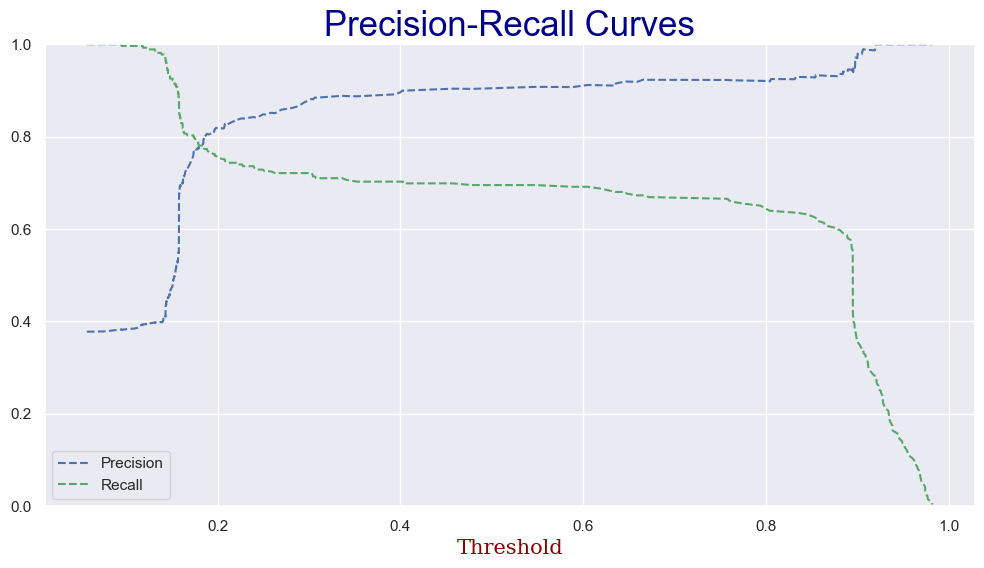

In [42]:
# Predict on train data
y_scaled_scores_SVM_rbf = model_SVM_rbf.predict_proba(X_train_scaled)

precisions_SVM_rbf, recalls_SVM_rbf, thresholds_SVM_rbf = precision_recall_curve(y_train_scaled, 
                                                                     y_scaled_scores_SVM_rbf[:,1])

# Plot values of precision-recall curve for linear model
plt.figure(figsize=myFigSize_12_6)
plt.plot(thresholds_SVM_rbf, precisions_SVM_rbf[:-1], 'b--', label='Precision')
plt.plot(thresholds_SVM_rbf, recalls_SVM_rbf[:-1], 'g--', label = 'Recall')
plt.title('Precision-Recall Curves',fontdict=fontTitles)
plt.xlabel('Threshold',fontdict=fontAxes)
plt.legend(loc='best')
plt.ylim([0,1])
plt.show()

In [66]:
# Calculating the exact threshold where precision and recall are equal.
optimal_threshold_SVM_rbf = 0.0

for i in np.arange(len(thresholds_SVM_rbf)):
    if precisions_SVM_rbf[i]==recalls_SVM_rbf[i]:
        optimal_threshold_SVM_rbf = np.round(thresholds_SVM_rbf[i],2)
        print('Optimal Threshold: ',optimal_threshold_SVM_rbf)

Optimal Threshold:  0.18


#### Model performance evaluation with optimal threshold on the training data

In [44]:
# Creating performance indicators and confusion matrix on train data
y_train_scaled_predictions_SVM_rbf_opt = model_SVM_rbf.predict_proba(X_train_scaled)
metrics_score(y_train_scaled, 
              y_train_scaled_predictions_SVM_rbf_opt[:,1] > optimal_threshold_SVM_rbf,False)

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       443
           1       0.78      0.78      0.78       269

    accuracy                           0.83       712
   macro avg       0.82      0.82      0.82       712
weighted avg       0.83      0.83      0.83       712
 



#### Model performance evaluation with optimal threshold on the test data

In [45]:
# Creating performance indicators and confusion matrix on train data
y_test_scaled_predictions_SVM_rbf_opt = model_SVM_rbf.predict_proba(X_train_scaled)
metrics_score(y_train_scaled, 
              y_train_scaled_predictions_SVM_rbf_opt[:,1] > optimal_threshold_SVM_rbf,False)

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       443
           1       0.78      0.78      0.78       269

    accuracy                           0.83       712
   macro avg       0.82      0.82      0.82       712
weighted avg       0.83      0.83      0.83       712
 



<a href = #construirModelos1>Back to **building models**</a>

----

<a name="KN"> </a>

## K-Neighbors

### Build model

In [46]:
# Quantity of neighbors determined in PCA section
model_KN = KNeighborsClassifier(n_neighbors=3)

# Training model
model_KN.fit(X_train_scaled,y_train_scaled)

KNeighborsClassifier(n_neighbors=3)

### Model performance evaluation on the scaled training data

              precision    recall  f1-score   support

           0       0.88      0.93      0.91       443
           1       0.88      0.79      0.83       269

    accuracy                           0.88       712
   macro avg       0.88      0.86      0.87       712
weighted avg       0.88      0.88      0.88       712
 



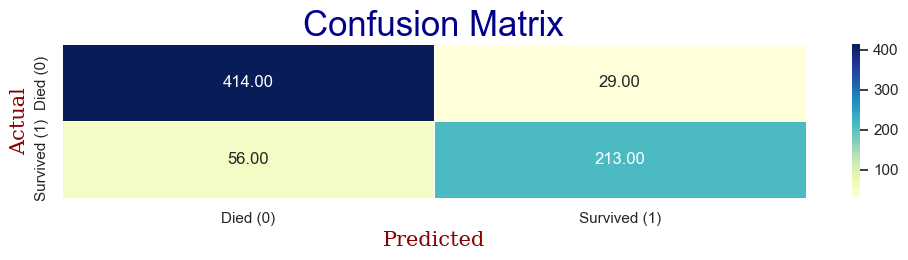

In [47]:
#Checking the model's performance using the evaluation function
y_train_scaled_predictions_KN = model_KN.predict(X_train_scaled)

#Calling the function and passing the datasets
metrics_score(y_train_scaled, y_train_scaled_predictions_KN, True)

### Model performance evaluation on the scaled test data

In [48]:
#Checking the model's performance using the evaluation function
y_test_scaled_predictions_KN = model_KN.predict(X_test_scaled)

#Calling the function and passing the datasets
metrics_score(y_test_scaled, y_test_scaled_predictions_KN, False)

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       106
           1       0.79      0.63      0.70        73

    accuracy                           0.78       179
   macro avg       0.78      0.76      0.77       179
weighted avg       0.78      0.78      0.78       179
 



<a href = #construirModelos1>Back to **building models**</a>

----

<a name="decisionTree"> </a>

## Decision Tree

### Build model

In [49]:
# Building decision tree model
model_DT = DecisionTreeClassifier(random_state = 1)

# Fitting decision tree model
model_DT.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

### Model Performance Evaluation on the Train Data

In [50]:
#Checking the model's performance using the evaluation function
y_train_predictions_DT = model_DT.predict(X_train)

#Calling the function and passing the datasets
metrics_score(y_train, y_train_predictions_DT, False)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       443
           1       1.00      0.97      0.98       269

    accuracy                           0.99       712
   macro avg       0.99      0.98      0.99       712
weighted avg       0.99      0.99      0.99       712
 



### Model Performance Evaluation on the Test Data

In [51]:
#Checking the model's performance using the evaluation function
y_test_predictions_DT = model_DT.predict(X_test)

#Calling the function and passing the datasets
metrics_score(y_test, y_test_predictions_DT, False)

              precision    recall  f1-score   support

           0       0.77      0.87      0.82       106
           1       0.77      0.63      0.69        73

    accuracy                           0.77       179
   macro avg       0.77      0.75      0.75       179
weighted avg       0.77      0.77      0.77       179
 



### Visualize the decision tree

### Important features based on the tuned decision tree

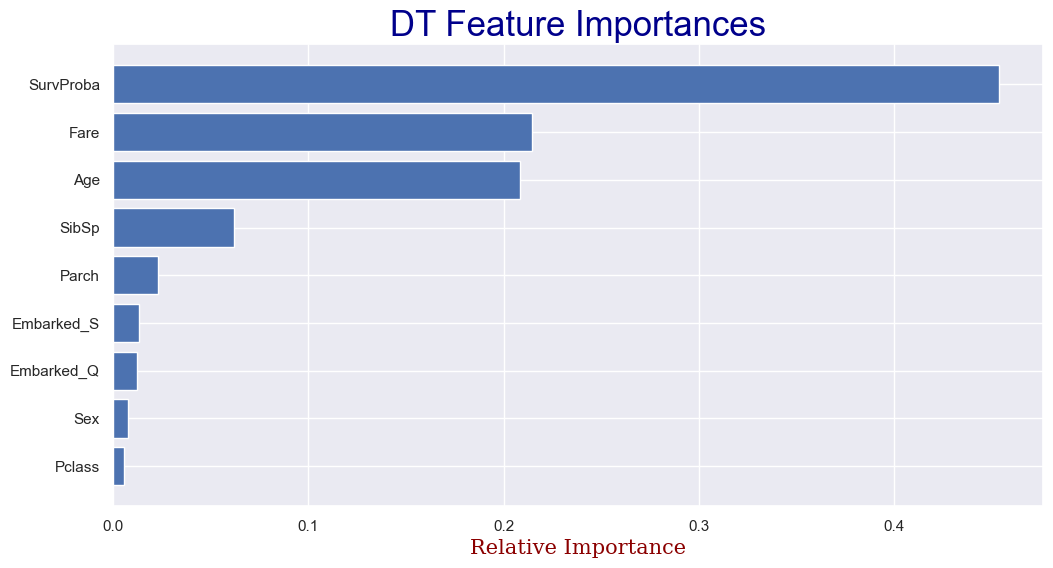

In [52]:
feature_names = X_train.columns
importances = model_DT.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=myFigSize_12_6)
plt.title("DT Feature Importances",fontdict=fontTitles)
plt.barh(range(len(indices)), importances[indices]) #, color="darkblue", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance",fontdict=fontAxes)
plt.show()

### Hyperparameter tuning using GridSearch CV

**Note:** Please use the following hyperparameters provided for tuning the Decision Tree. In general, you can experiment with various hyperparameters to tune the decision tree, but for this project, we recommend sticking to the parameters provided.

In [53]:
# Choose the type of classifier.
model_DT_estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {"max_depth": np.arange(2, 7, 2),
              "max_leaf_nodes": [50, 75, 150, 250],
              "min_samples_split": [10, 30, 50, 70]
             }

# Run the grid search
grid_obj = GridSearchCV(model_DT_estimator, parameters)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
model_DT_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
model_DT_estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=50, min_samples_split=10,
                       random_state=1)

### Model Performance Evaluation on the training data

In [54]:
#Checking the model's performance using the evaluation function
y_train_predictions_DT_Tuned = model_DT_estimator.predict(X_train)

#Calling the function and passing the datasets
metrics_score(y_train, y_train_predictions_DT_Tuned, False)

              precision    recall  f1-score   support

           0       0.83      0.96      0.89       443
           1       0.92      0.67      0.77       269

    accuracy                           0.85       712
   macro avg       0.87      0.81      0.83       712
weighted avg       0.86      0.85      0.84       712
 



### Model Performance Evaluation on the test data

In [55]:
#Checking the model's performance using the evaluation function
y_test_predictions_DT_Tuned = model_DT_estimator.predict(X_test)

#Calling the function and passing the datasets
metrics_score(y_test, y_test_predictions_DT_Tuned, False)

              precision    recall  f1-score   support

           0       0.75      0.94      0.84       106
           1       0.87      0.55      0.67        73

    accuracy                           0.78       179
   macro avg       0.81      0.75      0.75       179
weighted avg       0.80      0.78      0.77       179
 



<a href = #construirModelos1>Back to **building models**</a>

----

<a name="randomForest"> </a>

## Random Forest

### Build model

Building model on *unscaled* dataset since *random forest* model don't require scaled datasets.

In [56]:
# Building random forest model
model_RF = RandomForestClassifier(n_estimators=100, random_state=1)

# Fitting the model to the training data
model_RF.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

### Model Performance Evaluation on the training data

In [57]:
#Checking the model's performance using the evaluation function
y_train_predictions_RF = model_RF.predict(X_train)

#Calling the function and passing the datasets
metrics_score(y_train, y_train_predictions_RF, False)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       443
           1       0.98      0.99      0.98       269

    accuracy                           0.99       712
   macro avg       0.99      0.99      0.99       712
weighted avg       0.99      0.99      0.99       712
 



### Model Performance Evaluation on the test data

In [58]:
#Checking the model's performance using the evaluation function
y_test_predictions_RF = model_RF.predict(X_test)

#Calling the function and passing the datasets
metrics_score(y_test, y_test_predictions_RF, False)

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       106
           1       0.80      0.64      0.71        73

    accuracy                           0.79       179
   macro avg       0.79      0.77      0.77       179
weighted avg       0.79      0.79      0.78       179
 



### Important Features based on the random forest

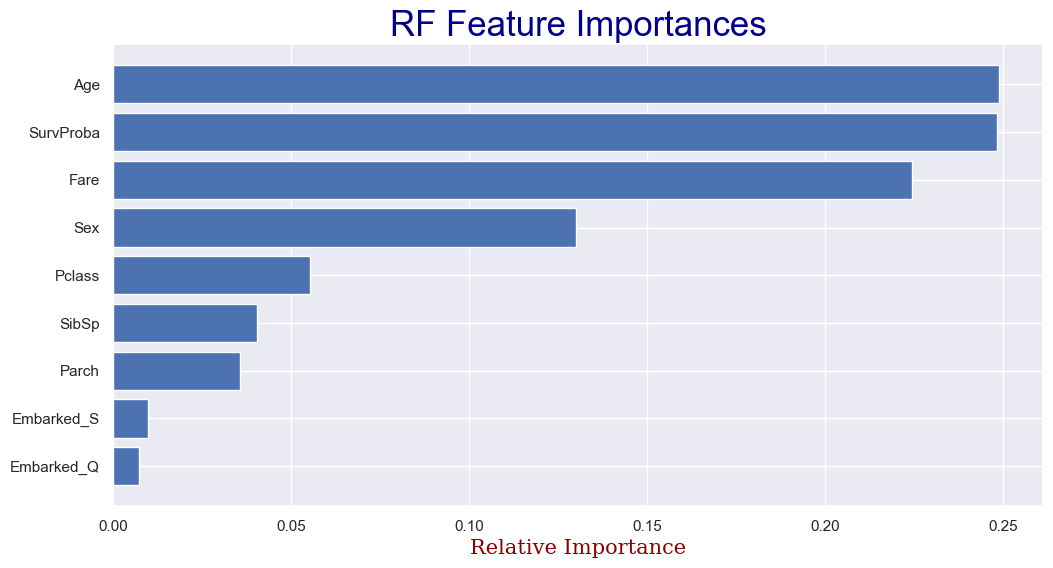

In [60]:
feature_names = X_train.columns
importances = model_RF.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=myFigSize_12_6)
plt.title("RF Feature Importances",fontdict=fontTitles)
plt.barh(range(len(indices)), importances[indices]) #, color="darkblue", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance",fontdict=fontAxes)
plt.show()

## Comparison Table of Models Performance on Test Data 

In [68]:
# Separation line symbol
sep_symbol = '- '
reps = 27

# Calling function for printing model metrics and scores
print('Logistic Regression:')
metrics_score(y_test_scaled, y_test_scaled_predictions_LG,False)   
print(sep_symbol * reps)

print('Logistic Regression with Optimal Threshold:')
metrics_score(y_test_scaled, 
              y_test_scaled_predictions_LG_opt[:,1] > optimal_threshold_LG,False)
print(sep_symbol * reps)

print('Support Vector Machine - Linear Kernel:')
metrics_score(y_test_scaled, y_test_scaled_predictions_SVM_lk, False)
print(sep_symbol * reps)

print('Support Vector Machine - RBF Kernel:')
metrics_score(y_test_scaled, y_test_scaled_predictions_SVM_rbf, False)
print(sep_symbol * reps)

print('Support Vector Machine with Optimal Threshold- RBF Kernel:')
metrics_score(y_train_scaled, 
              y_train_scaled_predictions_SVM_rbf_opt[:,1] > optimal_threshold_SVM_rbf,False)
print(sep_symbol * reps)

print('K-Neighbors:')
metrics_score(y_test_scaled, y_test_scaled_predictions_KN, False)
print(sep_symbol * reps)

print('Decision Tree:')
metrics_score(y_test, y_test_predictions_DT, False)
print(sep_symbol * reps)

print('Decision Tree (tuned):')
metrics_score(y_test, y_test_predictions_DT_Tuned, False)
print(sep_symbol * reps)

print('Random Forest:')
metrics_score(y_test, y_test_predictions_RF, False)



Logistic Regression:
              precision    recall  f1-score   support

           0       0.77      0.90      0.83       106
           1       0.80      0.60      0.69        73

    accuracy                           0.78       179
   macro avg       0.78      0.75      0.76       179
weighted avg       0.78      0.78      0.77       179
 

- - - - - - - - - - - - - - - - - - - - - - - - - - - 
Logistic Regression with Optimal Threshold:
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       106
           1       0.77      0.74      0.76        73

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179
 

- - - - - - - - - - - - - - - - - - - - - - - - - - - 
Support Vector Machine - Linear Kernel:
              precision    recall  f1-score   support

           0       0.74      0.92      0.82       106
           1      

<a href = #construirModelos1>Back to **building models**</a>

<a href = #top>Back to top</a>

----

<a name="enviarPrediccion"> </a> 

# Creating the predictions for submission

## Loading the dataset

In [ ]:
# Import csv file
dataset_sbmt = pd.read_csv('test.csv', index_col=0)

### Validate data load

In [ ]:
dataset_sbmt.sample(n=5,random_state=1)

## Reshaping the dataset to modelling inputs

In [ ]:
dataset_sbmt = addAgeBins(dataset_sbmt)

dataset_sbmt.sample(n=5,random_state=1)

## Filling Missing Values

In [ ]:
dataset_sbmt = fillingMissingValues(dataset_sbmt)

dataset_sbmt.sample(n=5,random_state=1)

## Adding engineered feature

In [ ]:
dataset_sbmt['SurvProba'] = dataset_sbmt.apply(survivalProbability,axis=1)

dataset_sbmt.sample(n=5,random_state=1)

## Transforming imported training dataset for modelling

Creating dataset to be used for the models training.

### Dropping features not relevant for modelling

In [ ]:
# Dropping features
dataset_models_sbmt = dataset_sbmt.drop(['Name','Cabin','Fare','Ticket','Age_bin'],axis=1) #,inplace=True)

dataset_models_sbmt.sample(n=5,random_state=1)

### Encoding and mapping categorical columns 

In [ ]:
# Mapping sex feature
dictSex = {'male': 1, 'female' : 0}

dataset_models_sbmt.Sex = dataset_models_sbmt.Sex.map(dictSex)

dataset_models_sbmt.sample(n=5,random_state=1)

In [ ]:
# Creating dummy variables
dataset_models_sbmt = pd.get_dummies(data = dataset_models_sbmt, 
                                 columns = ['Embarked'], 
                                 drop_first = True)

dataset_models_sbmt.sample(n=5,random_state=1)

### Splitting features from target variable

Current datasets columns list.

In [ ]:
# Features dataset
X_sbmt = dataset_models_sbmt.copy(deep=True)

X_sbmt.sample(n=5,random_state=1)

### Checking dataset shape

In [ ]:
print('X: ',X_sbmt.shape)

## Create scaled training and test datasets

We will scale the data for predicting with the **Logistic Regression** and **SVM**.  

### Scaling features (X)

In [ ]:
# Scaling training dataset
X_sbmt_scaled = pd.DataFrame(scaler.fit_transform(X_sbmt), 
                             index=X_sbmt.index,
                             columns=X_sbmt.columns)

X_sbmt_scaled.sample(n=5,random_state=1)

## Visually validate training datasets with submitting dataset

### Datasets (not scaled)

#### Training modelling

In [ ]:
X.sample(n=5,random_state=1)

#### Prediction submitting

In [ ]:
X_sbmt.sample(n=5,random_state=1)

### Datasets (scaled)

#### Training modelling

In [ ]:
X_scaled.sample(n=5,random_state=1)

#### Prediction submitting

In [ ]:
X_sbmt_scaled.sample(n=5,random_state=1)

## Create predictions using submitting dataset

### Logistic Regression Model

In [ ]:
y_sbmt_LG = model_LG.predict(X_sbmt_scaled)

# Composing the predictions dataset
dataset_prediction_LG = pd.DataFrame({"PassengerId":dataset_sbmt.index,
                                       "Survived":y_sbmt_LG})

dataset_prediction_LG

### Random Forest Model

In [ ]:
y_sbmt_RF = model_RF.predict(X_sbmt)

# Composing the predictions dataset
dataset_prediction_RF = pd.DataFrame({"PassengerId":dataset_sbmt.index,
                                       "Survived":y_sbmt_RF})

dataset_prediction_RF

## Export predictions to '.csv' file

### Logistic Regression Model

In [ ]:
dataset_prediction_LG.to_csv('y_predictions_LG.csv',index=False)

### Random Forest Model

In [ ]:
dataset_prediction_RF.to_csv('y_predictions_RF.csv',index=False)

<a href = #top>Back to top</a>

----

<a name="exportarModelos"> </a>

# Export Datasets for ANN Modelling

## Training Datasets

In [ ]:
# X & y dataset split: X_train, X_test, y_train, y_test
# X_scaled & y_scaled dataset split: X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled

X_train.to_csv("X_train.csv")

X_train_scaled.to_csv("X_train_scaled.csv")

y_train.to_csv("y_train.csv")

print('Datasets shapes:\n', '-' * 80)
print('X Train:          ', X_train.shape)
print('X Train (scaled): ', X_train_scaled.shape)
print('Y Train:          ', y_train.shape)

## Test Datasets

In [ ]:
X_test.to_csv("X_test.csv")

X_test_scaled.to_csv("X_test_scaled.csv")

y_test.to_csv("y_test.csv")

print('Datasets shapes:\n', '-' * 80)
print('X Test:          ', X_test.shape)
print('X Test (scaled): ', X_test_scaled.shape)
print('Y Test:          ', y_test.shape)

## Submission Dataset

If the final submission dataset features are different from the originally uploaded submission dataset for prediction, then this dataset also needs to be exported for the ANN model.

In [ ]:
X_sbmt.to_csv("X_sbmt.csv")

X_sbmt_scaled.to_csv("X_sbmt_scaled.csv")

print('Datasets shapes:\n', '-' * 80)
print('X Submission:          ', X_sbmt.shape)
print('X Submission (scaled): ', X_sbmt_scaled.shape)

<a href = #top>Back to top</a>

----

<a name="implementarModelos"> </a>

# Model Deployment

## Import additional libraries

## Create the model pipeline

### Identify transformations

### Define column transformations

In [ ]:
myColumnTransformer = make_column_transformer((StandardScaler(),numeric),
                                              #('PassThrough',passthrough),
                                              remainder='passthrough'
                                             )

myColumnTransformer

### Assembling the model pipeline

In [ ]:
myModelPipeline = make_pipeline(myColumnTransformer, 
                                #Use best performance model
                                tree.DecisionTreeRegressor()
                               )

myModelPipeline

### Training the model pipeline

In [ ]:
myModelPipeline.fit(X_train,y_train)

### Validate model's predictions

In [ ]:
myModelPipeline.predict(X_train)

## Model Serialization

In [ ]:
# Defining path to save the model
model_path = 'models/dt_model-v1.joblib'

# Create models folder. Exception will be thrown if folder already exists
try:
    os.mkdir('models')
except OSError as exception
    print(exception)

# Saving the model to the path as a binary file
joblib.dump(myModelPipeline, model_path, )

print('Model Size (MB):', (os.path.getsize(model_path)/1000000))

### Validating the saved model

In [ ]:
wait_predictor = joblib.load(model_path)

wait_predictor

## Interface Deployment Test

### Server response function

In [ ]:
def get_wait_prediction('features of UI to feed into the model'):
    # Convert UI features to values
    # Convert Dropdown string to value
    if (Alternative == 'No'):
        Alt = 0
    else:
        Alt = 1
    (...)
    # Access values of the individual features from the inputs passed in 
    # by the user. Map these features to a dictionary with key-value pairs 
    # of the columns expected by the model.
    sample = {'Feature Value 1' : Alt,
              'HasBar' : Bar, 
              'IsFriSat' : Fri,
              'IsHungry' : Hun, 
              'CrowdPatron' : Pat,
              'PriceRng' : Price, 
              'IsRain' : Rain,
              'HasReservation' : Res,
              'RestType' : Type,
              'WaitEstimate' : Est}

    # Create a data frame with one row containing the values of the features
    # assembled from the dictionary created above. The shape of this data frame
    # is 1 x 10
    data_point = pd.DataFrame([sample])

    # pass the data frame to the model (price_predictor) and convert the 
    # output (a numpy array) to a Python list. Remember that Gradio does not
    # understand a numpy type. Hence this conversion.

    prediction = wait_predictor.predict(data_point).tolist()
    # return a response with the prediction from the model. 
    #return prediction[0]    
    if (prediction[0] == 1):
        return 'Yes'
    else:
        return 'No'

### Configure Gradio Interface and Launch to Test

In [ ]:
wait_demo = gr.Interface(fn=get_wait_prediction, 
             inputs= #'text',
             [
                 #gr.inputs.Textbox(type='number',default=1,label='Hay alternativa (No = 0, Sí = 1)'),
                 gr.inputs.Dropdown(['No','Yes'],
                                    default='No',
                                    label='Is there an alternative option?'),
                 gr.inputs.Dropdown(['No','Yes'],
                                    default='No',
                                    label='Has a bar area to wait?'),
                 gr.inputs.Dropdown(['No','Yes'],
                                    default='No',
                                    label='Is it Friday or Saturday?'),
                 gr.inputs.Dropdown(['No','Yes'],
                                    default='No',
                                    label='Is the customer hungry?'),
                 gr.inputs.Dropdown(['No','Some','Full'],
                                    default='No',
                                    label='Is the restaurant crowded?'),
                 gr.inputs.Dropdown(['Low','Medium','High'],
                                    default='Low',
                                    label='Price rate:'),
                 gr.inputs.Dropdown(['No','Yes'],
                                    default='No',
                                    label='Is it raining?'),
                 gr.inputs.Dropdown(['No','Yes'],
                                    default='No',
                                    label='Has the customer a reservation?'),
                 gr.inputs.Dropdown(['French','Thai','Italian','Burger'],
                                    default='French',
                                    label='Restaurant Type?'),
                 gr.inputs.Dropdown(['0 to 10','11 to 30','31 to 60','More than 60'],
                                    default='0 to 10',
                                    label='Wait estimate in minutes:')
             ],                          
             outputs=gr.outputs.Textbox(label='Will the customer wait?'), 
             #gr.outputs.Textbox, #'text', #output,
             description='This model predicts if a customer at a restaurant will wait to be seated depending on the following conditions list.\n\nPlease fill each condition selecting from the provided options to estimate if the customer will wait or not.\n\nDeveloped & deployed: franz.ulrich@gmail.com',
             title='Restaurant\'s Customer Wait Prediction Model', 
             theme='darkhuggingface')

wait_demo.launch()

<a href = #top>Back to top</a>